# Predict behavior to retain customers.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import/Load the dataset
churn_data=pd.read_csv('C:/Users/91988/Documents/Python Scripts/Datasets/churn_analysis.csv')

In [3]:
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128.0,415.0,382-4657,no,yes,25,265.1,110.0,45.07,...,99.0,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107.0,415.0,371-7191,no,yes,26,161.6,123.0,27.47,...,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137.0,415.0,358-1921,no,no,0,243.4,114.0,41.38,...,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84.0,408.0,375-9999,yes,no,0,299.4,71.0,50.90,...,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75.0,415.0,330-6626,yes,no,0,166.7,113.0,28.34,...,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Dimension of the datset
churn_data.shape

(3333, 21)

### Different Business problems

* Question 1 : Which customer has highest probability to switch to another telecom(known as churn)
* Question 2 : What could be the possible reasons why churn is hapening
* Question 3: How good is the prediction is ? can we rely on this predictive analytics

In [5]:
# More details about the data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3330 non-null float64
area code                 3332 non-null float64
phone number              3332 non-null object
international plan        3332 non-null object
voice mail plan           3332 non-null object
number vmail messages     3333 non-null int64
total day minutes         3330 non-null float64
total day calls           3331 non-null float64
total day charge          3328 non-null float64
total eve minutes         3332 non-null float64
total eve calls           3330 non-null float64
total eve charge          3332 non-null float64
total night minutes       3331 non-null float64
total night calls         3333 non-null int64
total night charge        3330 non-null float64
total intl minutes        3332 non-null float64
total intl calls          3333 non-null int64
total intl charge         3332 non-null

In [6]:
# Create a copy of data
churn_df=churn_data

In [7]:
churn_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
# Remove Unwanted columns
churn_df=churn_df.drop(['phone number'], axis=1)

In [9]:
churn_df.shape

(3333, 20)

In [10]:
# Convert area code and churn column into categorical
#df.Weight = df.Weight.astype('int64')
churn_df['area code']=churn_df['area code'].astype('object')
churn_df['churn']=churn_df['churn'].astype('object')
churn_df.dtypes

state                      object
account length            float64
area code                  object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls           float64
total day charge          float64
total eve minutes         float64
total eve calls           float64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                      object
dtype: object

In [11]:
# Check for missing values in training set
churn_df.isnull().sum()

state                     0
account length            3
area code                 1
international plan        1
voice mail plan           1
number vmail messages     0
total day minutes         3
total day calls           2
total day charge          5
total eve minutes         1
total eve calls           3
total eve charge          1
total night minutes       2
total night calls         0
total night charge        3
total intl minutes        1
total intl calls          0
total intl charge         1
customer service calls    0
churn                     0
dtype: int64

In [12]:
# Check the missing value percentage
churn_df.apply(lambda x: x.isnull().sum()/len(x)*100)

state                     0.000000
account length            0.090009
area code                 0.030003
international plan        0.030003
voice mail plan           0.030003
number vmail messages     0.000000
total day minutes         0.090009
total day calls           0.060006
total day charge          0.150015
total eve minutes         0.030003
total eve calls           0.090009
total eve charge          0.030003
total night minutes       0.060006
total night calls         0.000000
total night charge        0.090009
total intl minutes        0.030003
total intl calls          0.000000
total intl charge         0.030003
customer service calls    0.000000
churn                     0.000000
dtype: float64

In [13]:
# Drop all the missing values
churn_df=churn_df.dropna()

In [14]:
# Check for missing values in training set
churn_df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [15]:
# Dimension of data
churn_df.shape

(3308, 20)

In [16]:
# Summary of the dataset
summary=churn_df.describe(include='all')
summary

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3308,3308.000000,3308.0,3308,3308,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.00000,3308.000000,3308.000000,3308.000000,3308.000000,3308
unique,51,NaN,3.0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,415.0,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,104,NaN,1642.0,2986,2393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2827
mean,NaN,100.985187,NaN,NaN,NaN,8.093712,179.810339,100.386336,30.568301,200.818047,100.146614,17.069746,200.876149,100.106711,9.03951,10.241929,4.481862,2.765831,1.562273,NaN
std,NaN,39.813711,NaN,NaN,NaN,13.683614,54.459880,20.062830,9.258158,50.631189,19.905658,4.303634,50.631472,19.544707,2.27846,2.789151,2.465603,0.753044,1.316336,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.04000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.52000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.250000,100.000000,17.105000,201.100000,100.000000,9.05000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,20.000000,216.225000,114.000000,36.755000,235.100000,114.000000,19.980000,235.400000,113.000000,10.59000,12.100000,6.000000,3.270000,2.000000,NaN


In [17]:
# categorical data in dataset
cat_data=churn_df.select_dtypes(exclude=['number', 'float'])
cat_data.head()

,state,area code,international plan,voice mail plan,churn
0,KS,415,no,yes,False
1,OH,415,no,yes,False
2,NJ,415,no,no,False
3,OH,408,yes,no,False
4,OK,415,yes,no,False


In [18]:
cat_data.shape

(3308, 5)

In [19]:
# Numerical data in the dataset 
num_data=churn_df.select_dtypes(exclude=['bool_', 'object_'])
num_data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128.0,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107.0,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137.0,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84.0,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75.0,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3


In [20]:
num_data.shape

(3308, 15)

#### check Collinearity
* Bcz we have Numerical Features in dataset
* total day minutes and total day charge

In [21]:
# Check for Multicollinearity
corr_abs=churn_df.corr().abs
corr_abs

<bound method NDFrame.abs of                         account length  number vmail messages  \
account length                1.000000              -0.006741   
number vmail messages        -0.006741               1.000000   
total day minutes             0.007622               0.000270   
total day calls               0.036234              -0.011127   
total day charge              0.007620               0.000269   
total eve minutes            -0.006505               0.018293   
total eve calls               0.016260              -0.009466   
total eve charge             -0.006494               0.018308   
total night minutes          -0.009165               0.008182   
total night calls            -0.011428               0.010832   
total night charge           -0.009168               0.008165   
total intl minutes            0.011800               0.002699   
total intl calls              0.020813               0.014328   
total intl charge             0.011833               0.002722

In [22]:

# corr_abs=churn_df.corr().abs

# sol=(np.where(np.triu(np.ones(corr_abs.shape), k=1),astype(np.bool)
#             .stack()
#              .sort_values(ascending=False)))

In [23]:
corr_matrix = churn_df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('total day minutes', 'total day charge'),
 ('total eve minutes', 'total eve charge'),
 ('total night minutes', 'total night charge'),
 ('total intl minutes', 'total intl charge')]

In [24]:
# Drop the features with highest correlation pair
# Here dropping the charge columns which are highly correlated to minutes columns

churn_df.drop(['total day charge','total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)
churn_df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn'],
      dtype='object')

In [25]:
churn_df.shape

(3308, 16)

In [26]:
# Check how data is distributed
# Histogram
# It only plots numerical data
# are they normally distributed i.e bell shaped curve
# are skewed to the left or Right : indicates data is not propery sampled, data has bias, eg: that one population is higher than other
 # --mchine learning tends to be biased as well

# Therefore we should make sure data is normal. i.e it should look like a bell curved



In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019948EDED48>,
      dtype=object)

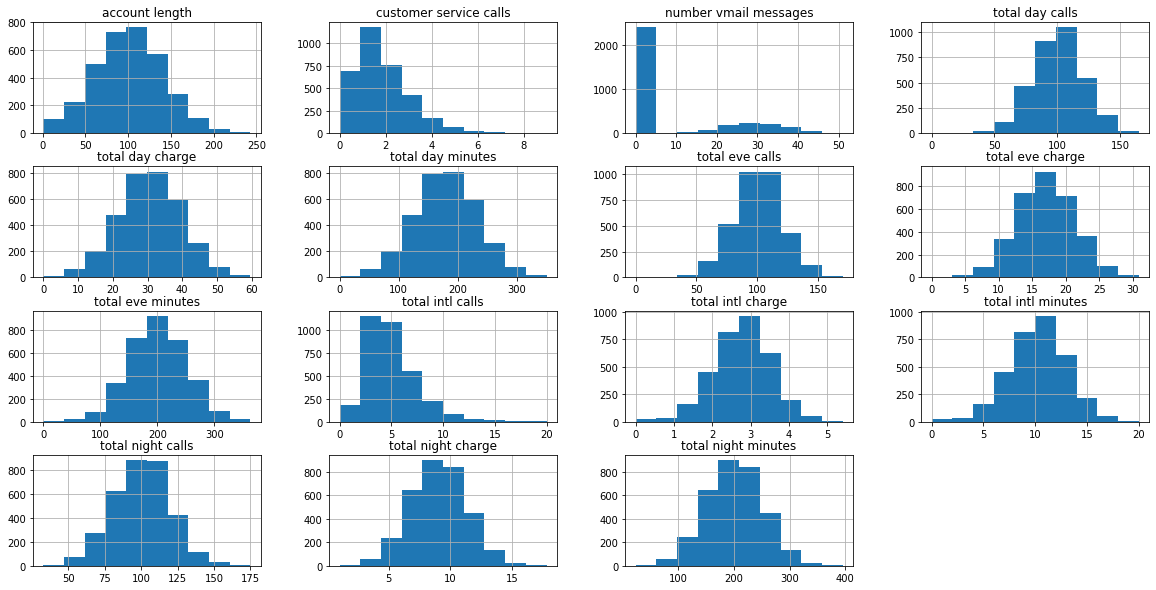

In [28]:
# Check how data is distributed

num_data.hist(figsize=(20, 10))

* there are few features like Number of voice mail messages, customer service calls are biased and need to be taken care of

C:\Users\91988\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


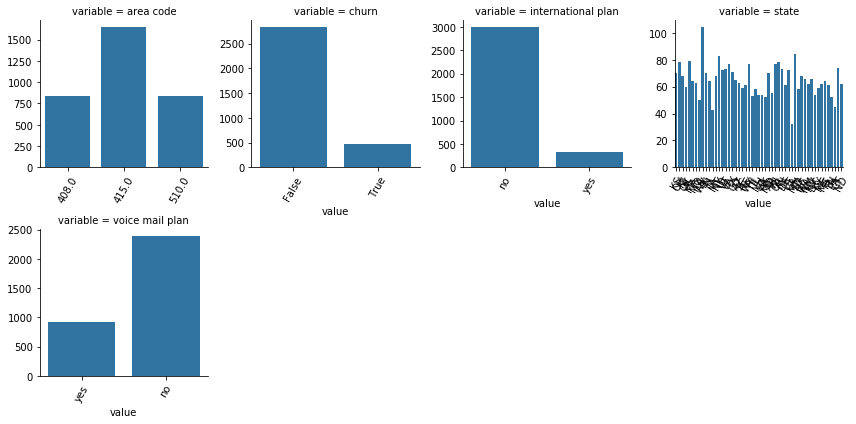

In [29]:

import seaborn as sns

# plot categorical data using seaborn's Facetgrid and pandas melt function

f=pd.melt(churn_df, value_vars=sorted(cat_data))
g=sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot, 'value')

[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


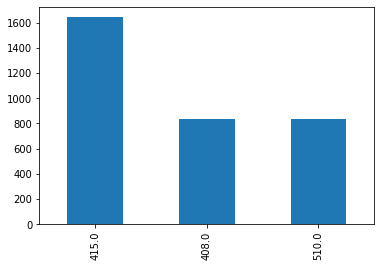

In [30]:
cat_data['area code'].value_counts().plot(kind='bar')

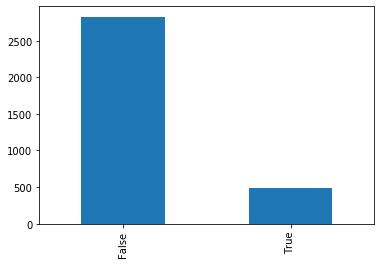

In [31]:
cat_data['churn'].value_counts().plot(kind='bar')

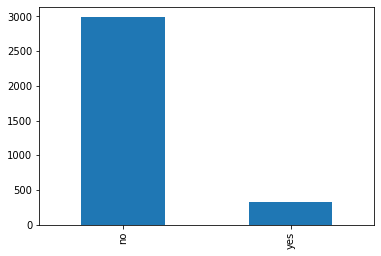

In [32]:
cat_data['international plan'].value_counts().plot(kind='bar')

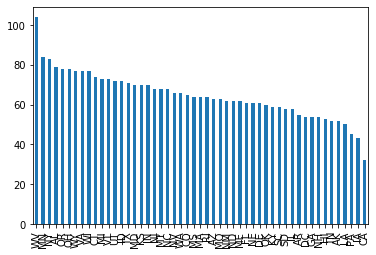

In [33]:
cat_data['state'].value_counts().plot(kind='bar')

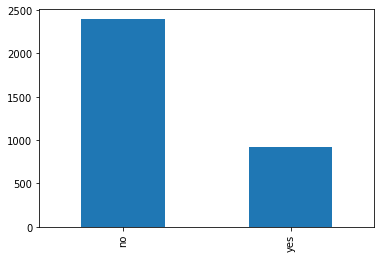

In [34]:
cat_data['voice mail plan'].value_counts().plot(kind='bar')

# Steps to take based on visualization
1. Normalize the numerical data
2. Convert the categorical data into numerical data so that we can feed the in ML Algorithms
3. Also some features are skewed and has imbalanced dataset. so need to handle that as well

In [35]:
#As we already know that the data has sampling issue for couple of features 
# as well as the target(output) variable.

#is_churn = churn_df['churn']=='yes' #creating a filter where churn ='yes'
#y_true = churn_df.churn[is_churn]

#print ("We are interested in the YES class, but has less data = "+str( (y_true.shape[0] / churn_df["churn"].shape[0]) * 100 ))

We are interested in the YES class, but has less data = 0.0


In [36]:
# Convert categorical data into numerical Data

#We can do label encoding from the preprocessing library in sklearn

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

churn_df['state'] = label_encoder.fit_transform(churn_df['state'])
churn_df['international plan'] = label_encoder.fit_transform(churn_df['international plan'])
churn_df['voice mail plan'] = label_encoder.fit_transform(churn_df['voice mail plan'])
churn_df['area code'] = label_encoder.fit_transform(churn_df['area code'])

print (churn_df.dtypes)

state                       int32
account length            float64
area code                   int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls           float64
total eve minutes         float64
total eve calls           float64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
churn                      object
dtype: object


In [37]:
churn_df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,16,128.0,1,0,1,25,265.1,110.0,197.4,99.0,244.7,91,10.0,3,1,False
1,35,107.0,1,0,1,26,161.6,123.0,195.5,103.0,254.4,103,13.7,3,1,False
2,31,137.0,1,0,0,0,243.4,114.0,121.2,110.0,162.6,104,12.2,5,0,False
3,35,84.0,0,1,0,0,299.4,71.0,61.9,88.0,196.9,89,6.6,7,2,False
4,36,75.0,1,1,0,0,166.7,113.0,148.3,122.0,186.9,121,10.1,3,3,False


In [38]:
churn_df.shape

(3308, 16)

In [78]:
# x and y
x=churn_df.drop('churn', axis=1)
#x=churn_df.loc[:, churn_df.columns!='churn']
x.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128.0,1,0,1,25,265.1,110.0,197.4,99.0,244.7,91,10.0,3,1
1,35,107.0,1,0,1,26,161.6,123.0,195.5,103.0,254.4,103,13.7,3,1
2,31,137.0,1,0,0,0,243.4,114.0,121.2,110.0,162.6,104,12.2,5,0
3,35,84.0,0,1,0,0,299.4,71.0,61.9,88.0,196.9,89,6.6,7,2
4,36,75.0,1,1,0,0,166.7,113.0,148.3,122.0,186.9,121,10.1,3,3


In [79]:
x.shape

(3308, 15)

In [82]:
y=churn_df[['churn']]
y.head()

,churn
0,False
1,False
2,False
3,False
4,False


In [83]:
y.shape

(3308, 1)

In [89]:
y1=pd.get_dummies(y, drop_first=True)
y1

,churn_True
0,0
1,0
2,0
3,0
4,0
...,...
3324,0
3325,0
3326,0
3331,0


In [43]:
# Let's standardize the data
# standardizing can help features arrive in more digestible form for these algorithms.
#Basically get to solution (Gradient Descent faster).

#A quick difference between Standardize and Normalize.
#Normalization usually means to scale a variable to have a values between 0 and 1, 
# while standardization transforms data to have a mean of zero and a standard deviation of 1.


#You can read more about it here
# https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

#scaler = preprocessing.StandardScaler()
#X = scaler.fit_transform(x)

# Train Test split

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y1, test_size=0.20)

In [95]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2646, 15)
(2646, 1)
(662, 15)
(662, 1)


# RandomForest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [97]:
rfc.fit(x_train, y_train)

C:\Users\91988\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\91988\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
# Check accuracy on training
rfc.score(x_train, y_train)

0.9916855631141346

In [101]:
# Prediction
y_pred=rfc.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[557,   6],
       [ 47,  52]], dtype=int64)

In [103]:
(557+52)/(557+6+47+52)

0.9199395770392749

In [104]:
# Accuracy on test
rfc.score(x_test, y_test)

0.9199395770392749

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       563
           1       0.90      0.53      0.66        99

    accuracy                           0.92       662
   macro avg       0.91      0.76      0.81       662
weighted avg       0.92      0.92      0.91       662



In [106]:
# Extract predicted Churn customers 
x_test['rfc_pred']=y_pred

C:\Users\91988\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
x_test

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,rfc_pred
784,24,107.0,1,0,1,22,281.1,83.0,143.7,130.0,239.4,128,11.2,9,1,0
444,48,85.0,0,1,0,0,165.4,107.0,196.0,126.0,349.2,110,9.6,7,2,0
3023,26,103.0,2,0,1,35,110.5,101.0,208.3,81.0,87.4,77,13.9,2,4,1
1818,8,78.0,0,0,0,0,139.2,140.0,191.4,113.0,286.5,125,11.8,3,3,0
2417,10,120.0,0,0,0,0,98.2,99.0,186.7,85.0,146.7,96,9.3,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,22,147.0,1,0,0,0,130.6,83.0,208.1,144.0,204.6,72,15.6,3,3,0
2167,4,120.0,2,0,0,0,134.8,94.0,204.1,106.0,238.4,109,6.7,8,1,0
3257,34,171.0,1,0,0,0,137.5,110.0,198.1,109.0,292.7,131,13.3,5,2,0
1663,49,191.0,0,0,0,0,162.0,104.0,241.2,120.0,210.4,83,10.9,7,1,0


In [108]:
churn_customer_rcf=x_test.query('rfc_pred==True')

In [110]:
churn_customer_rcf.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,rfc_pred
3023,26,103.0,2,0,1,35,110.5,101.0,208.3,81.0,87.4,77,13.9,2,4,1
1837,30,117.0,2,1,0,0,54.2,100.0,303.2,84.0,171.8,84,8.6,2,1,1
1974,17,113.0,0,0,1,20,157.8,83.0,161.5,56.0,271.5,100,8.7,2,5,1
3205,25,111.0,0,0,0,0,294.7,90.0,294.6,72.0,260.1,121,10.8,3,1,1
2622,14,86.0,2,0,1,16,144.8,105.0,206.2,111.0,255.4,117,11.6,2,4,1


In [111]:
churn_customer_rcf.shape

(58, 16)